## 경제지표와 아파트 가격의 관계를 알아보기
- EDA
    - Time Series Analysis
    - Correlation Analysis
    - Regression Analysis

In [57]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 한글폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [58]:
import torch
torch.cuda.is_available()
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3090'

In [59]:
data_root = '/root/ML-Regression/Competition/data/'
train_df = pd.read_csv(data_root + 'train.csv')
irk_df = pd.read_csv(data_root + 'IR_Korea.csv')

/tmp/ipykernel_202033/2569826116.py:2: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(data_root + 'train.csv')


In [60]:
display(train_df.head(2))
display(irk_df.head(2))

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500


,연도,국고채3년,국고채5년,국고채10년,회사채3년(AA-),CD91물,"콜금리(1일물,평균)",기준금리
0,1997,12.26,12.17,-,13.39,13.38,13.14,-
1,1998,12.94,13.18,-,15.10,15.22,14.90,-


In [61]:
irk_df.head(10)

,연도,국고채3년,국고채5년,국고채10년,회사채3년(AA-),CD91물,"콜금리(1일물,평균)",기준금리
0,1997,12.26,12.17,-,13.39,13.38,13.14,-
1,1998,12.94,13.18,-,15.10,15.22,14.90,-
2,1999,7.69,8.59,-,8.86,6.81,4.99,4.75
3,2000,8.30,8.67,7.76,9.35,7.08,5.14,5.25
4,2001,5.68,6.21,6.86,7.05,5.32,4.70,4
5,2002,5.78,6.26,6.59,6.56,4.81,4.19,4.25
6,2003,4.55,4.76,5.05,5.43,4.31,3.98,3.75
7,2004,4.11,4.35,4.73,4.73,3.79,3.62,3.25
8,2005,4.27,4.52,4.95,4.68,3.65,3.32,3.75
9,2006,4.83,4.96,5.15,5.17,4.48,4.19,4.5


In [62]:
train_df['계약년'] = train_df['계약년월'].apply(lambda x: int(str(x)[:4]))
train_df['계약월'] = train_df['계약년월'].apply(lambda x: int(str(x)[4:]))
train_df.drop('계약년월', axis=1, inplace=True)

In [63]:
train_df['시'] = train_df['시군구'].apply(lambda x: x.split()[0])
train_df['구'] = train_df['시군구'].apply(lambda x: x.split()[1])
train_df['동'] = train_df['시군구'].apply(lambda x: x.split()[2])
train_df.drop('시군구', axis=1, inplace=True)

In [64]:
train_df.rename(columns={'계약년':'연도'}, inplace=True)

train_df = train_df.merge(irk_df, on='연도', how='left')

In [65]:
train_df.head(2)

,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,해제사유발생일,...,시,구,동,국고채3년,국고채5년,국고채10년,회사채3년(AA-),CD91물,"콜금리(1일물,평균)",기준금리
0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,NaN,...,서울특별시,강남구,개포동,1.8,2.0,2.28,2.33,1.44,1.26,1.5
1,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,NaN,...,서울특별시,강남구,개포동,1.8,2.0,2.28,2.33,1.44,1.26,1.5


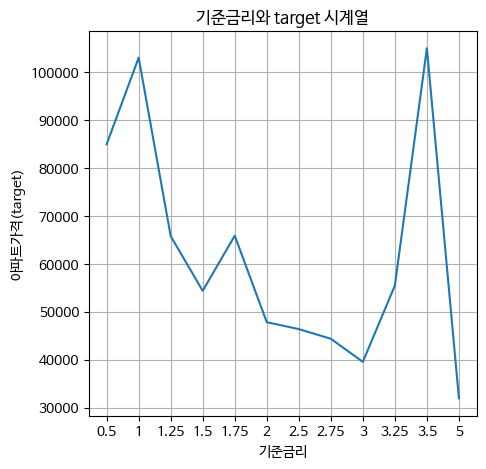

In [66]:
# 기준금리와 계약년, target 시계열  꺾은선 그래프
selected_data = train_df[['기준금리', 'target']]

# 건축년도가 같은 기준금리를 그룹화하여 평균값을 구함
selected_data = selected_data.groupby('기준금리').mean()

plt.figure(figsize=(5, 5))
plt.plot(selected_data.index, selected_data['target'], label='target')
plt.xlabel('기준금리')
plt.ylabel('아파트가격(target)')
plt.title('기준금리와 target 시계열')
plt.grid()

In [67]:
train_df.head(2)

,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,해제사유발생일,...,시,구,동,국고채3년,국고채5년,국고채10년,회사채3년(AA-),CD91물,"콜금리(1일물,평균)",기준금리
0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,NaN,...,서울특별시,강남구,개포동,1.8,2.0,2.28,2.33,1.44,1.26,1.5
1,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,NaN,...,서울특별시,강남구,개포동,1.8,2.0,2.28,2.33,1.44,1.26,1.5


/tmp/ipykernel_202033/1581221063.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, linecolor='white', cbar=True, square=True, mask=np.triu(train_df.corr()))


Text(0.5, 1.0, '변수간 상관계수 히트맵')

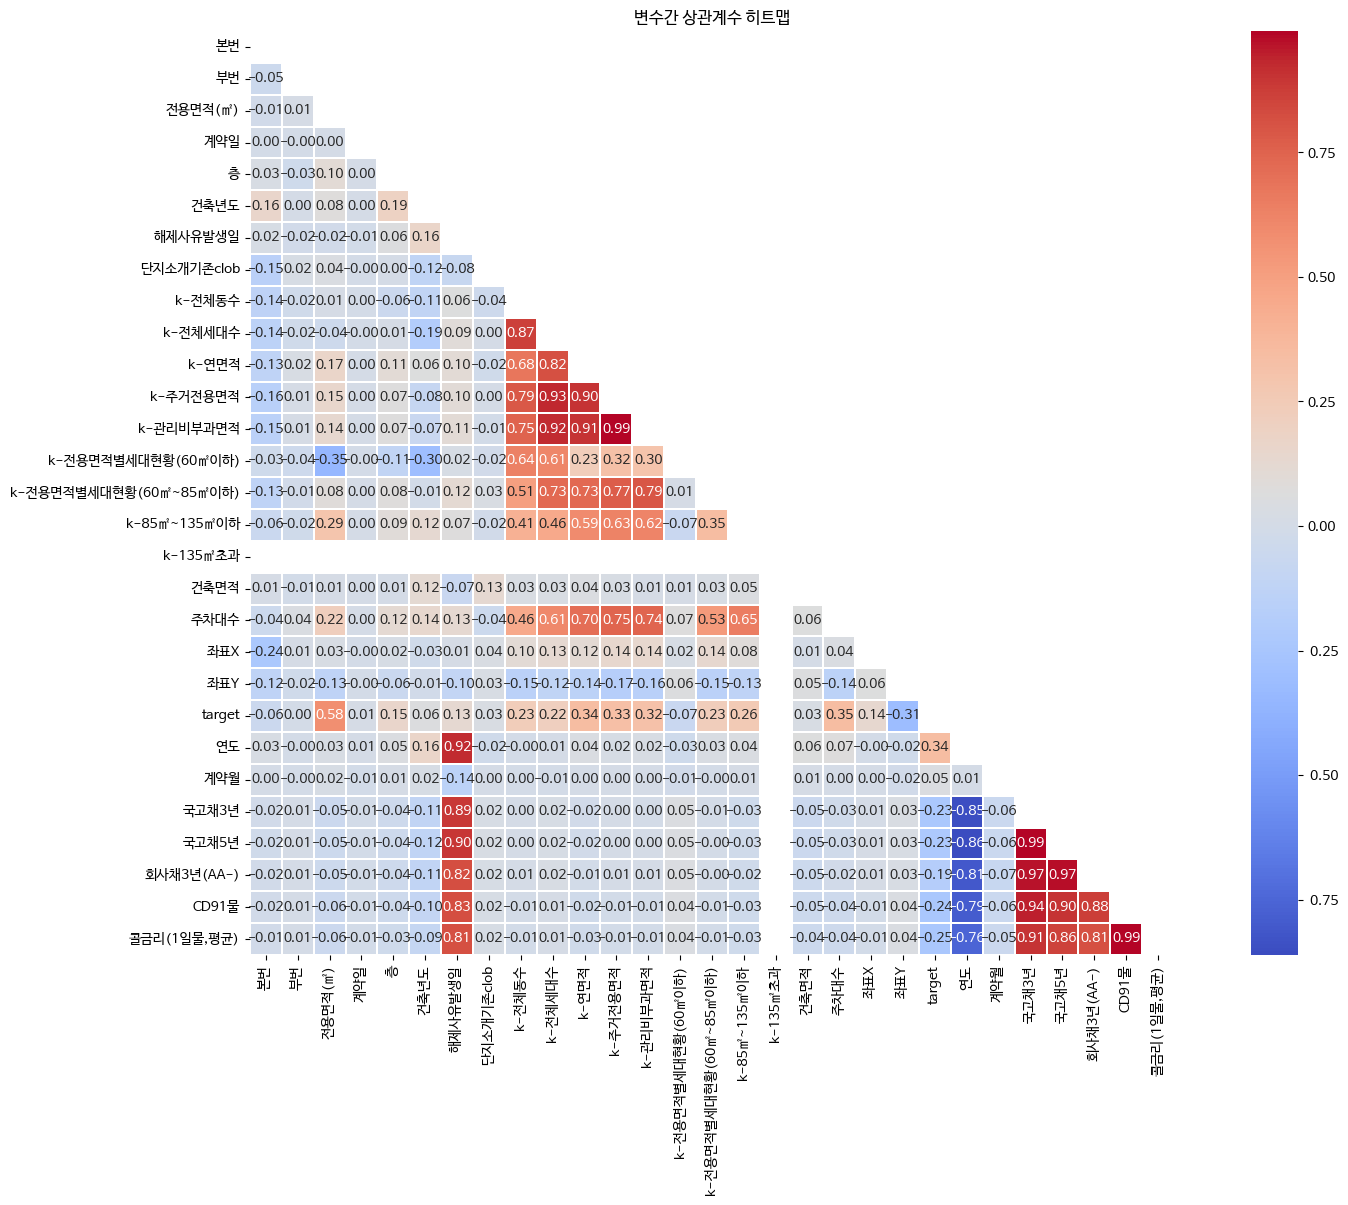

In [90]:
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, linecolor='white', cbar=True, square=True, mask=np.triu(train_df.corr()))
plt.title('변수간 상관계수 히트맵')

### 경제 지표 분석

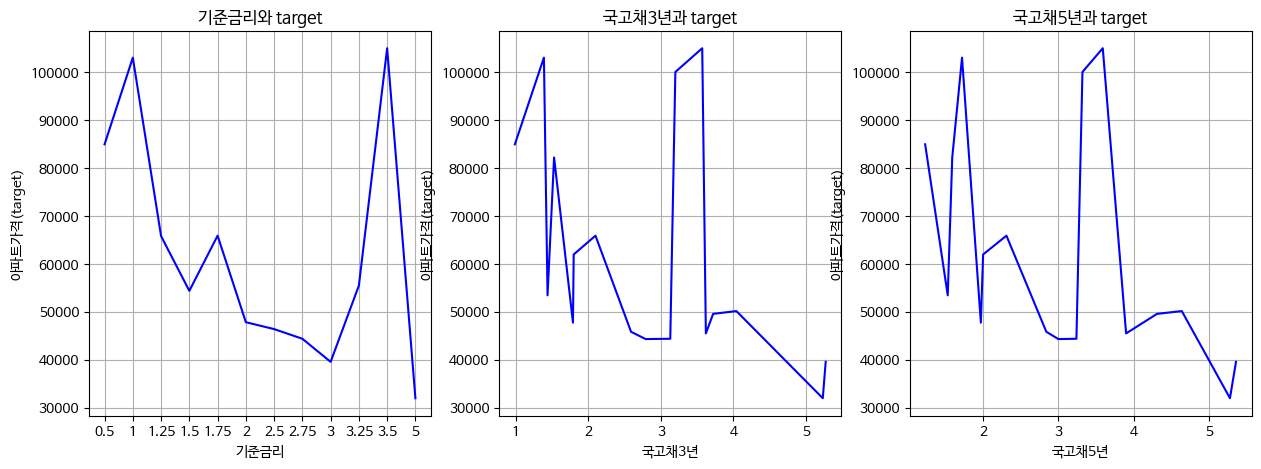

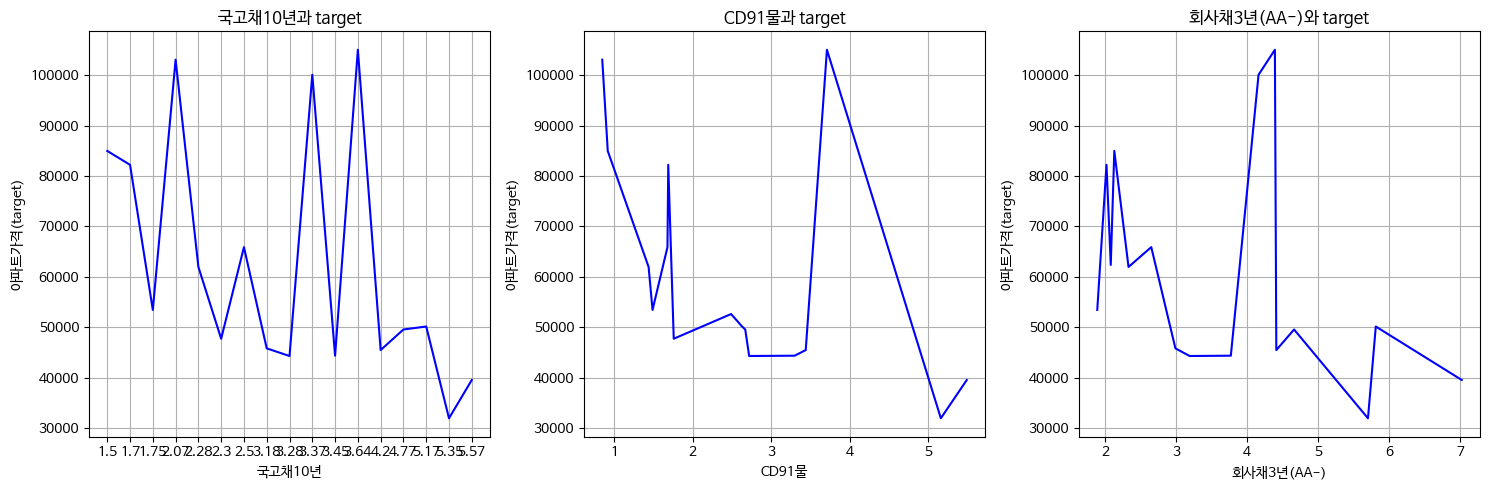

In [85]:
selected_data_interest = train_df[['기준금리', 'target']]
selected_data_interest = selected_data_interest.groupby('기준금리').mean()
selected_data_3 = train_df[['국고채3년', 'target']]
selected_data_3 = selected_data_3.groupby('국고채3년').mean()
selected_data_5 = train_df[['국고채5년', 'target']]
selected_data_5 = selected_data_5.groupby('국고채5년').mean()
selected_data_10 = train_df[['국고채10년', 'target']]
selected_data_10 = selected_data_10.groupby('국고채10년').mean()

selected_data_company = train_df[['회사채3년(AA-)', 'target']]
selected_data_company = selected_data_company.groupby('회사채3년(AA-)').mean()
selected_data_cd = train_df[['CD91물', 'target']]
selected_data_cd = selected_data_cd.groupby('CD91물').mean()
selected_data_call = train_df[['콜금리(1일물,평균)', 'target']]
selected_data_call = selected_data_call.groupby('콜금리(1일물,평균)').mean()


# Figure와 subplot 설정
fig, ax1 = plt.subplots(1, 3, figsize=(15, 5))
fig, ax2 = plt.subplots(1, 3, figsize=(15, 5))

ax1[0].plot(selected_data_interest.index, selected_data_interest['target'], color='b', label='target')
ax1[0].set_xlabel('기준금리')
ax1[0].set_ylabel('아파트가격(target)')
ax1[0].set_title('기준금리와 target')
ax1[0].grid()

ax1[1].plot(selected_data_3.index, selected_data_3['target'], color='b')
ax1[1].set_xlabel('국고채3년')
ax1[1].set_ylabel('아파트가격(target)')
ax1[1].set_title('국고채3년과 target')
ax1[1].grid()

ax1[2].plot(selected_data_5.index, selected_data_5['target'], color='b')
ax1[2].set_xlabel('국고채5년')
ax1[2].set_ylabel('아파트가격(target)')
ax1[2].set_title('국고채5년과 target')
ax1[2].grid()

ax2[0].plot(selected_data_10.index, selected_data_10['target'], color='b')
ax2[0].set_xlabel('국고채10년')
ax2[0].set_ylabel('아파트가격(target)')
ax2[0].set_title('국고채10년과 target')
ax2[0].grid()

ax2[1].plot(selected_data_cd.index, selected_data_cd['target'], color='b')
ax2[1].set_xlabel('CD91물')
ax2[1].set_ylabel('아파트가격(target)')
ax2[1].set_title('CD91물과 target')
ax2[1].grid()

ax2[2].plot(selected_data_company.index, selected_data_company['target'], color='b')
ax2[2].set_xlabel('회사채3년(AA-)')
ax2[2].set_ylabel('아파트가격(target)')
ax2[2].set_title('회사채3년(AA-)와 target')
ax2[2].grid()

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


/tmp/ipykernel_202033/1029789573.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_df.corr()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'target과 경제지표간 상관계수')

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


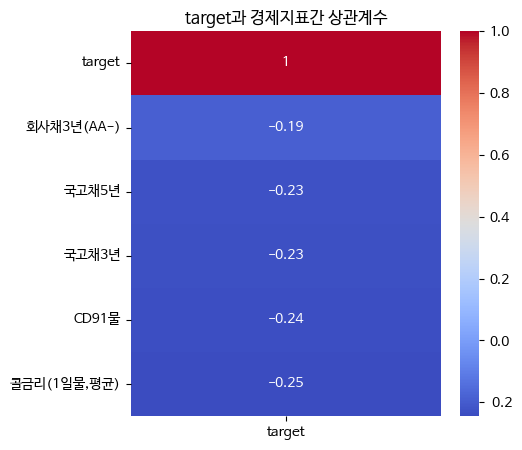

In [89]:
# target과 각 경제지표간 상관계수
corr_df = train_df[['target', '기준금리', '국고채3년', '국고채5년', '국고채10년', 'CD91물', '회사채3년(AA-)', '콜금리(1일물,평균)']]
corr = corr_df.corr()
corr = corr[['target']].sort_values(by='target', ascending=False)

plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')  
plt.title('target과 경제지표간 상관계수')

### 아파트 가격 분석

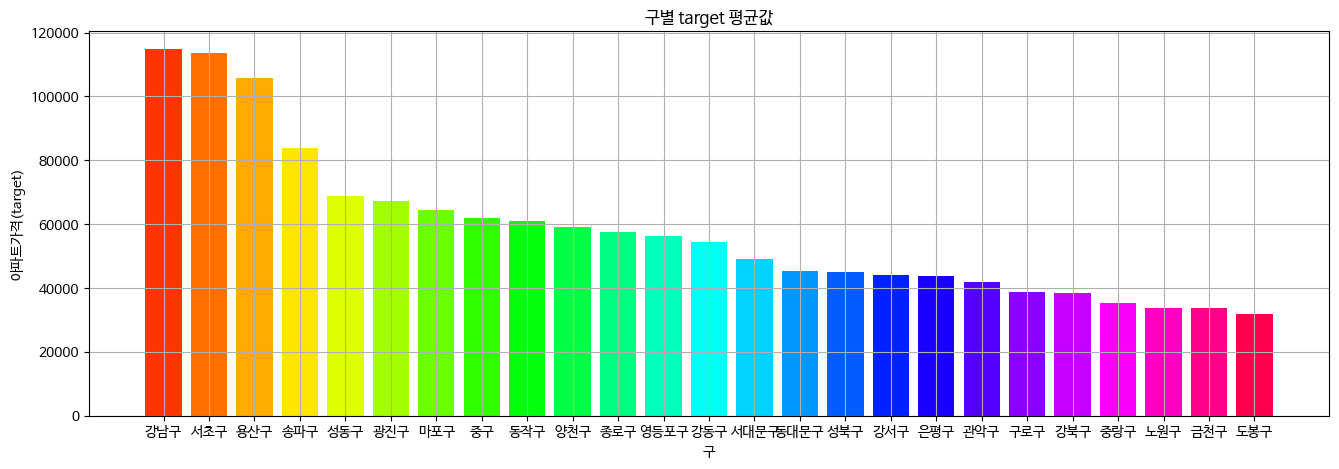

In [104]:
# 구, 동별 target 평균값
selected_data = train_df[['구', 'target']]
selected_data = selected_data.groupby('구').mean()
selected_data = selected_data.sort_values(by='target', ascending=False)

# 색상 설정
plt.figure(figsize=(16, 5))
plt.bar(selected_data.index, selected_data['target'], color=sns.color_palette('hsv', len(selected_data)))
plt.xlabel('구')
plt.ylabel('아파트가격(target)')
plt.title('구별 target 평균값')
plt.grid()

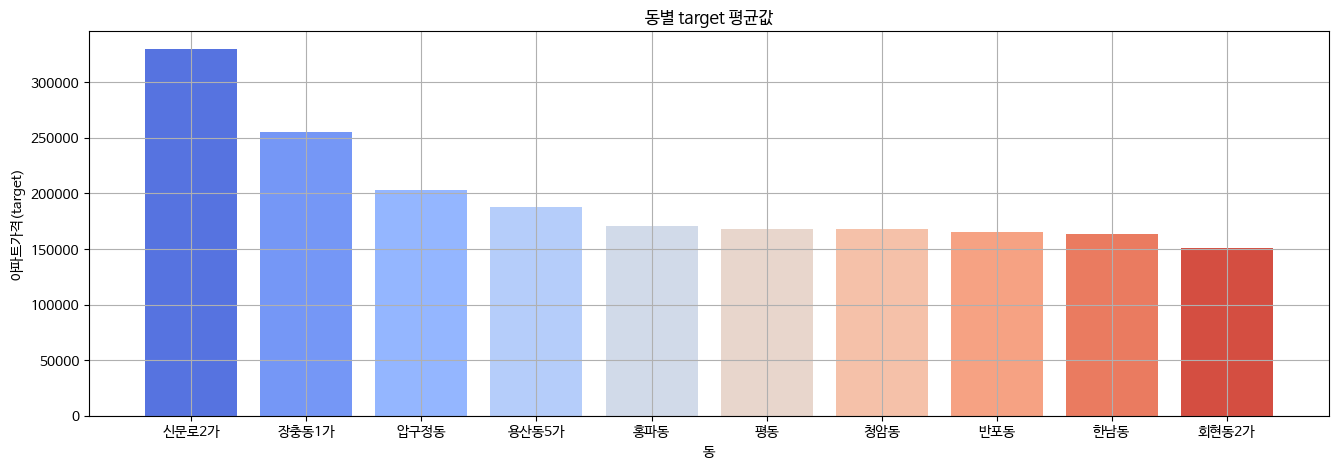

In [113]:
# 동별 target 평균값
selected_data = train_df[['동', 'target']]
selected_data = selected_data.groupby('동').mean()
# 상위 10개 동
selected_data = selected_data.sort_values(by='target', ascending=False).head(10)

# 색상 설정
plt.figure(figsize=(16, 5))
plt.bar(selected_data.index, selected_data['target'], color=sns.color_palette('coolwarm', len(selected_data)))
plt.xlabel('동')
plt.ylabel('아파트가격(target)')
plt.title('동별 target 평균값')
plt.grid()

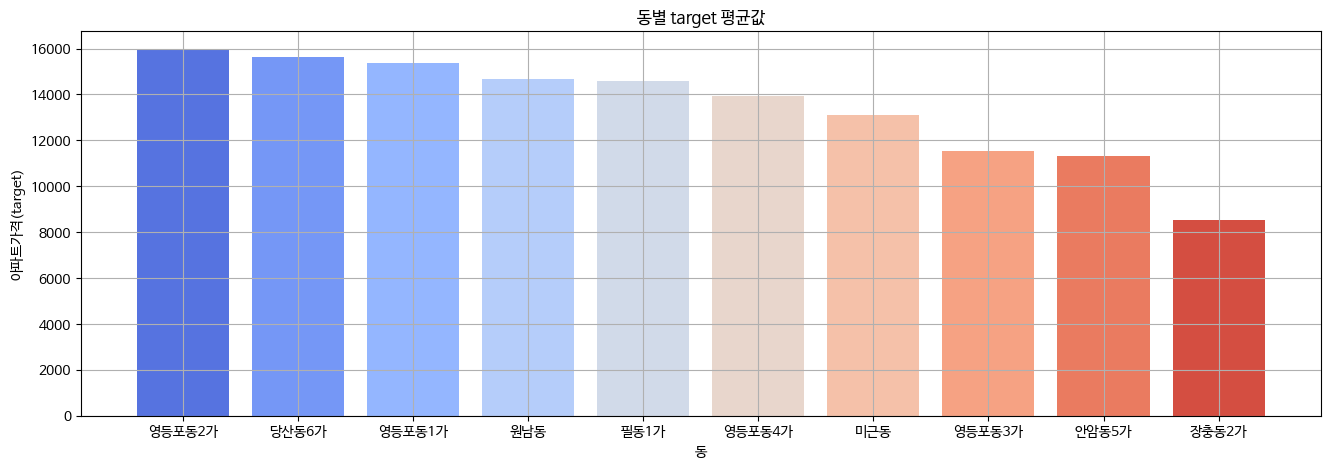

In [114]:
# 동별 target 평균값
selected_data = train_df[['동', 'target']]
selected_data = selected_data.groupby('동').mean()
# 상위 10개 동
selected_data = selected_data.sort_values(by='target', ascending=False).tail(10)

# 색상 설정
plt.figure(figsize=(16, 5))
plt.bar(selected_data.index, selected_data['target'], color=sns.color_palette('coolwarm', len(selected_data)))
plt.xlabel('동')
plt.ylabel('아파트가격(target)')
plt.title('동별 target 평균값')
plt.grid()

In [115]:
train_df.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약일', '층', '건축년도', '도로명',
       '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호',
       'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식',
       'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적',
       'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)',
       'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호',
       '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4',
       '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '연도',
       '계약월', '시', '구', '동', '국고채3년', '국고채5년', '국고채10년', '회사채3년(AA-)', 'CD91물',
       '콜금리(1일물,평균)', '기준금리'],
      dtype='object')

In [124]:
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/tmp/ipykernel_202033/3765914704.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [129]:
# 아파트명 전부 DataFrame 출력
pd.DataFrame(train_df['아파트명'].unique())

,0
0,개포6차우성
1,개포우성3차
2,개포자이
3,개포주공1단지
4,개포주공5단지
...,...
6534,옥인시민
6535,진달래3차
6536,807-39
6537,밀란체
